<a href="https://colab.research.google.com/github/kekwait/final-task-course/blob/main/%22%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%22_%D0%A0%D1%83%D0%B1%D0%BB%D0%B5%D0%BD%D0%BA%D0%BE_%D0%93%D0%BB%D0%B5%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание: 
Построить модель классификации на наборе данных Body Performance, сделать простое веб-приложение на Gradio

#Установка необходимы библиотек

In [ ]:
!pip install sweetviz
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv
import gradio as gr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

## Загрузка датасета

In [ ]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://disk.yandex.ru/d/5mI0kbSLSBD01w path/to/directory

--2023-05-10 16:59:07--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py.1’

ya.py.1             100%[===================>]     723  --.-KB/s    in 0s      

2023-05-10 16:59:07 (28.1 MB/s) - ‘ya.py.1’ saved [723/723]

--2023-05-10 16:59:08--  https://downloader.disk.yandex.ru/disk/56f2671674ea6eda806875dd8e422d9277fcb154cbb743777dc4e41be5afa566/645c059c/3v-krRA316KhQDn3zNPZX4HwlF4GN3JWIreVvZxgwp5qDAS3vC3MQK5zb8U0e3jnFqu1d7h7QYc-A-Qe92CoeA%3D%3D?uid=0&filename=bodyPerformance-dataset.csv&disposition=attachment&hash=hvFexZEHC6eeKFCtkKHvUUckNBy15/z6BX6on7TNH6yQSNKp/cz%2B/HTbJS%2BVLI/bq/J6bpmRyOJon

In [29]:
df = pd.read_csv("/content/bodyPerformance-dataset.csv", sep=';')

In [30]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,-,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13389 non-null  float64
 3   weight_kg                13392 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13391 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13392 non-null  float64
 8   sit and bend forward_cm  13391 non-null  float64
 9   sit-ups counts           13391 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


Набор данных включает в себя 13 393 строки, пронумерованных от 0 до 13 392.
Строка содержит 12 столбцов, которые являются признаками:
0. age - возраст;
1. gender - пол;
2. height_cm - рост, в см;
3. weight_kg - вес, в кг;
4. body_fat - процент жира;
5. diastolic - диастолическое артериальное давление;
6. systolic - систолическое артериальное давление;
7. gripForce - сила сжатия кулака (оценка с помощью динамометра);
8. sit and bend forward_cm - наклон вперед из положения сидя, результат в сантиметрах (от пяток до кончиков пальцев);
9. sit-ups counts - количество подъемов корпуса из положения лежа за 2 минуты;
10. broad jump_cm - результат прыжка в длину;
11. class - класс оценки физического состочния : A,B,C,D (A - лучший);

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


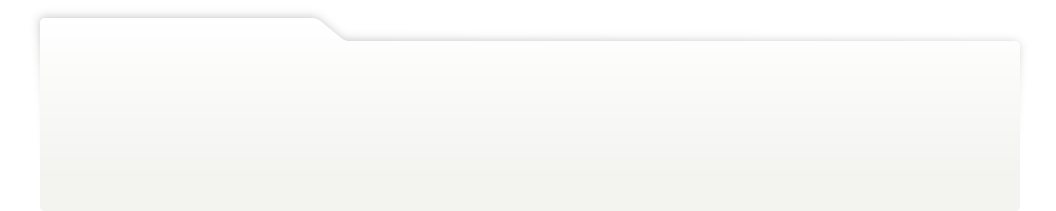
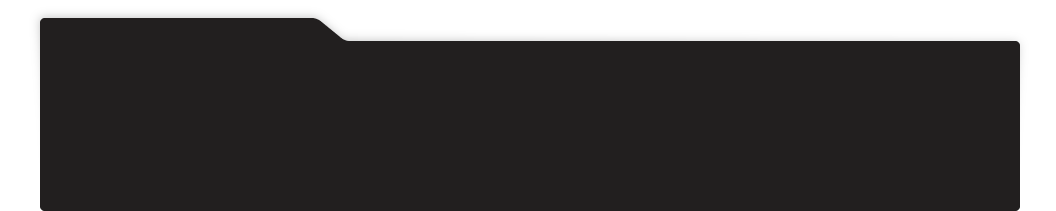
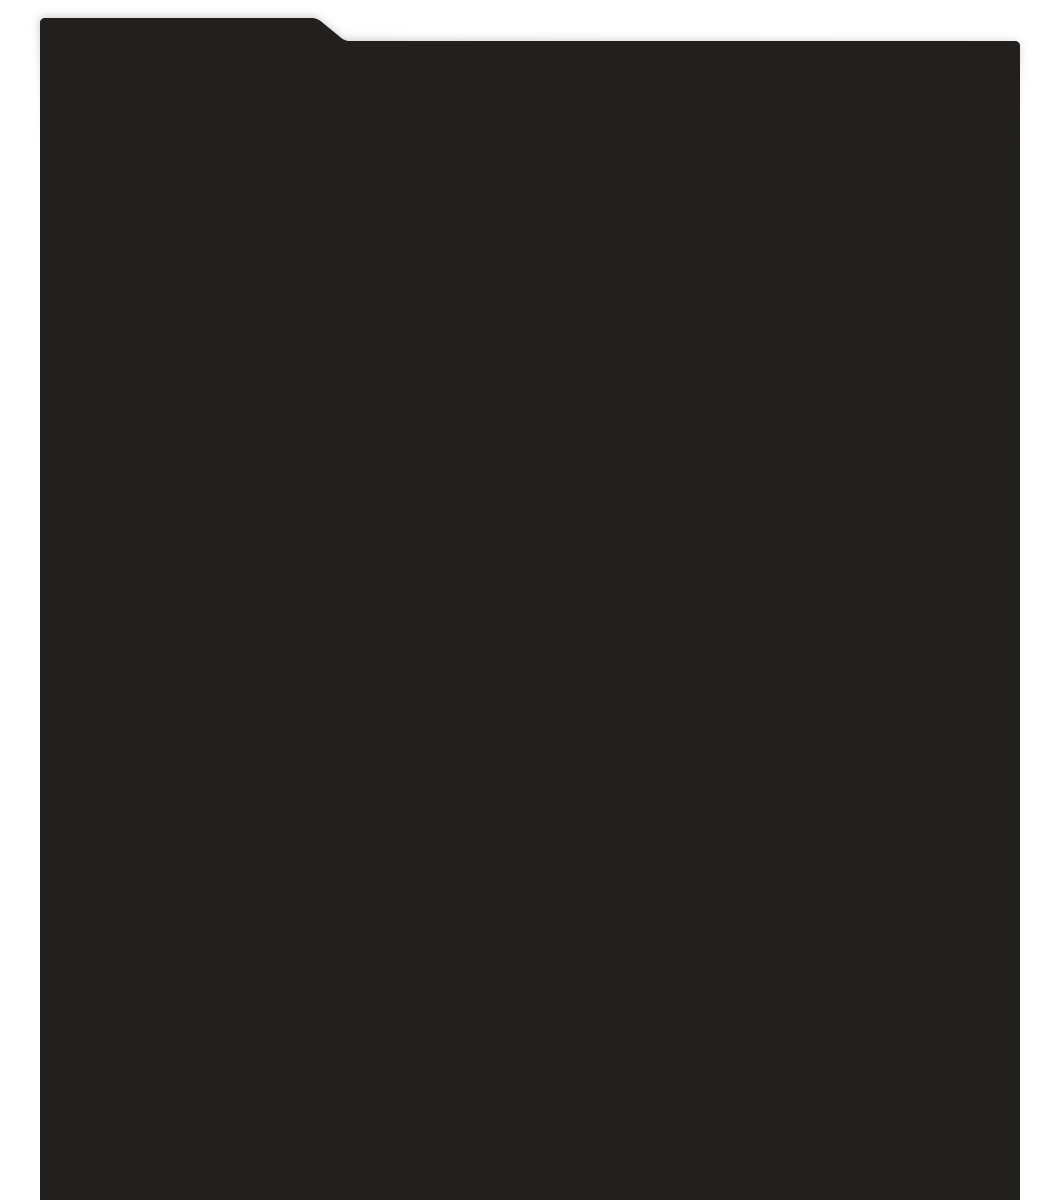
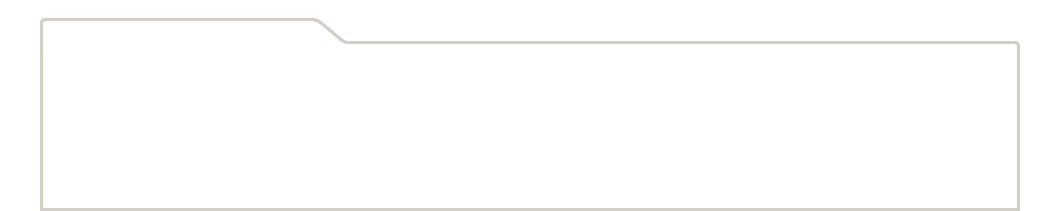
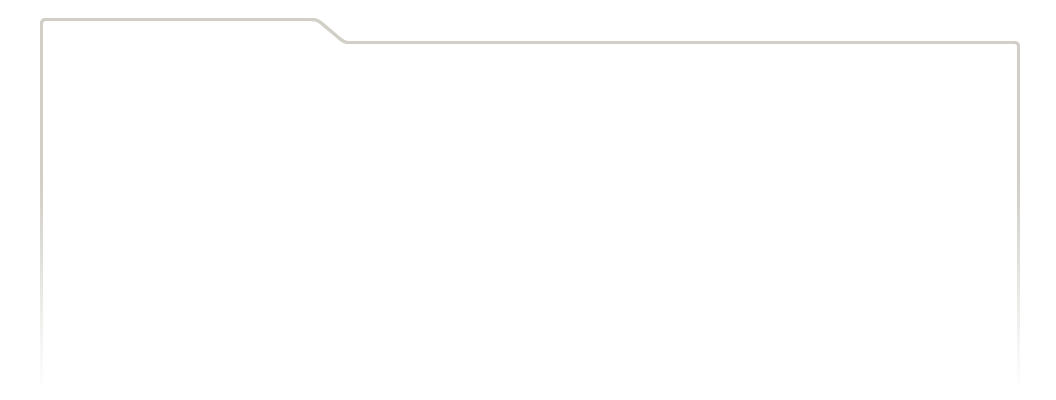
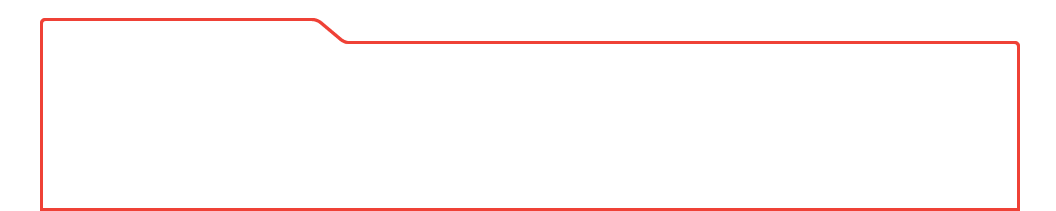
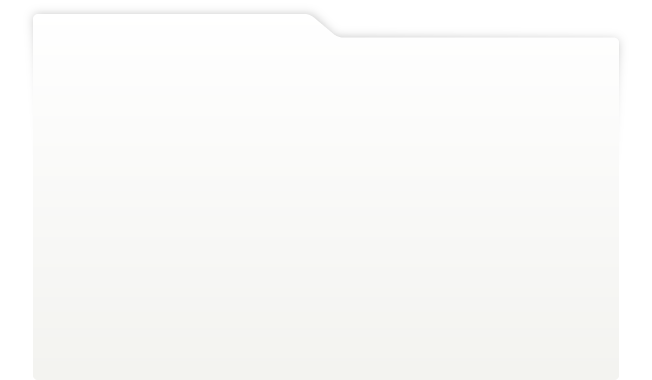
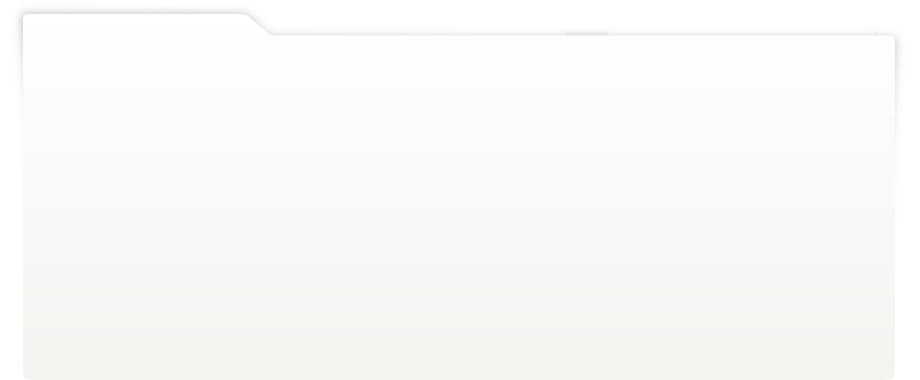
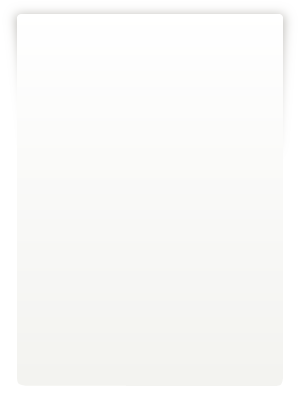
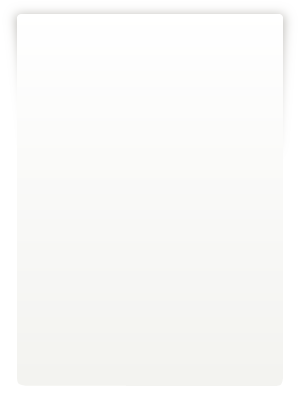
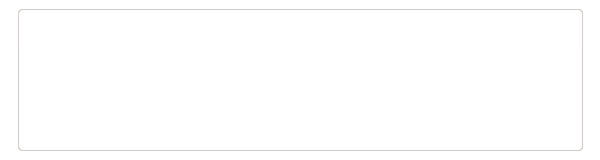
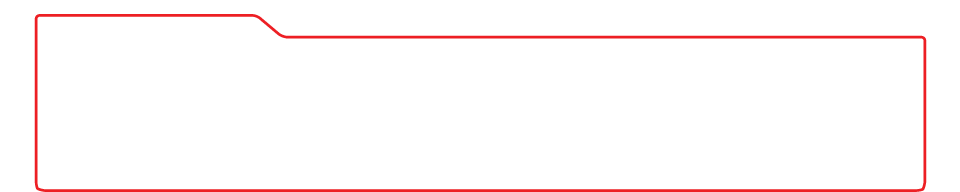
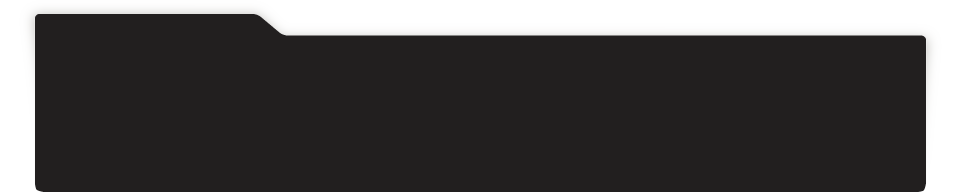
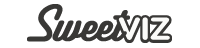
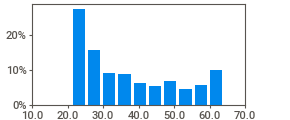
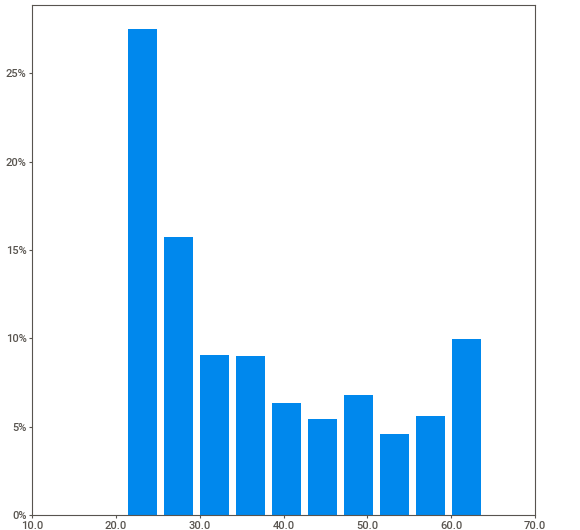
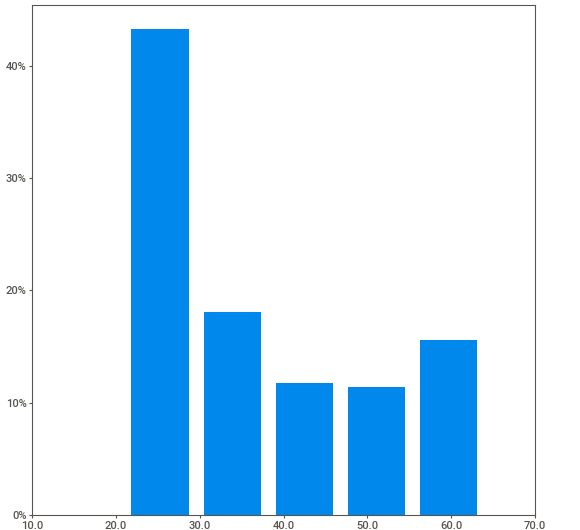
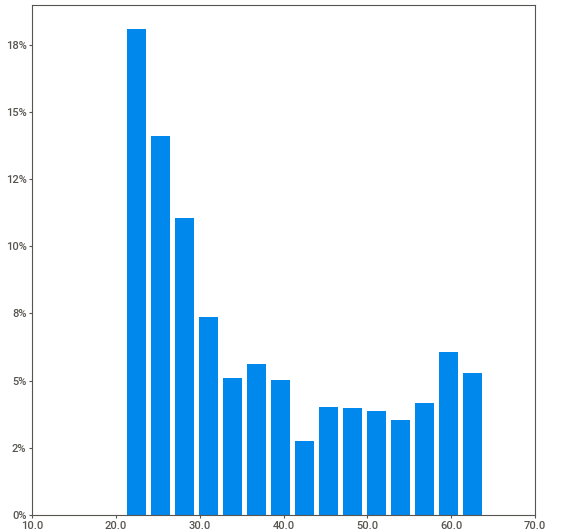
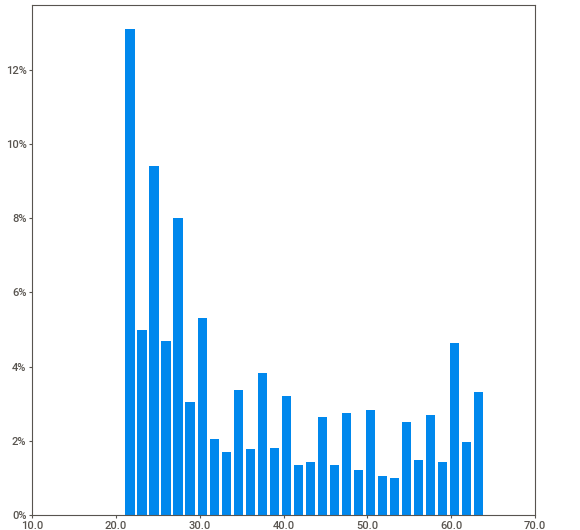
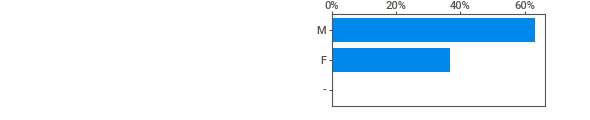
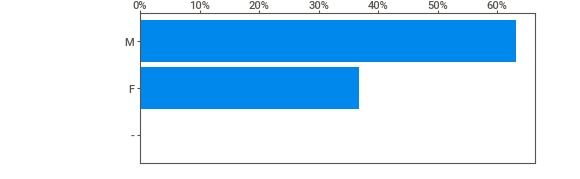
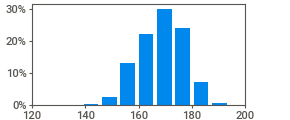
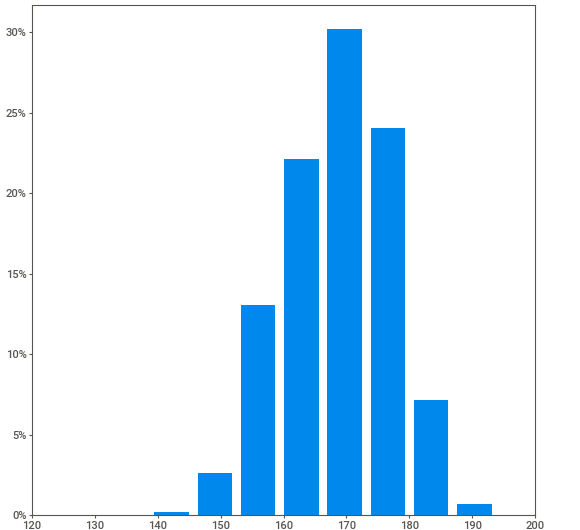
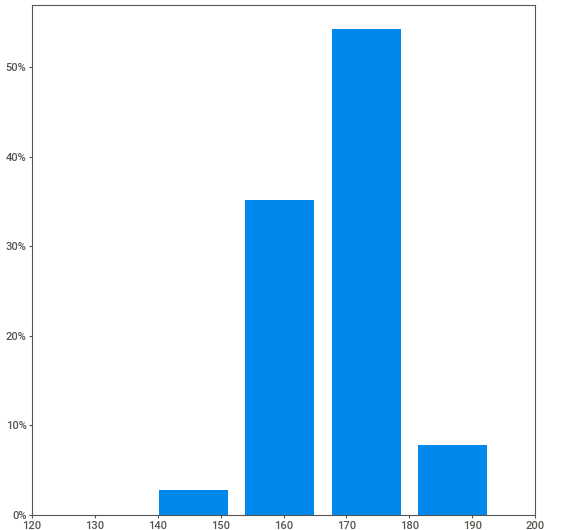
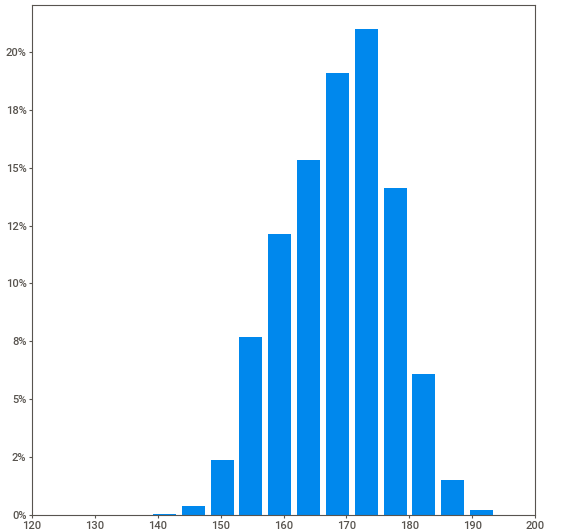
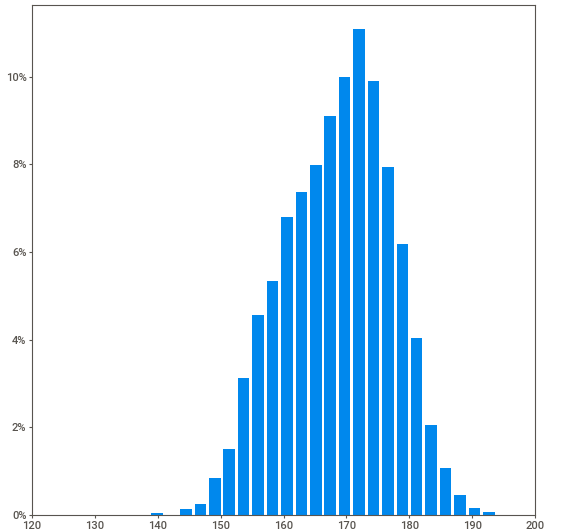
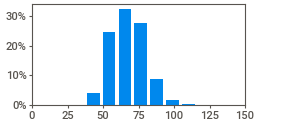
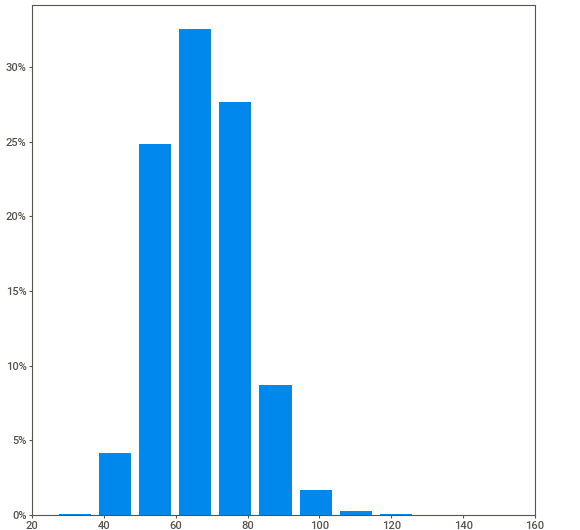
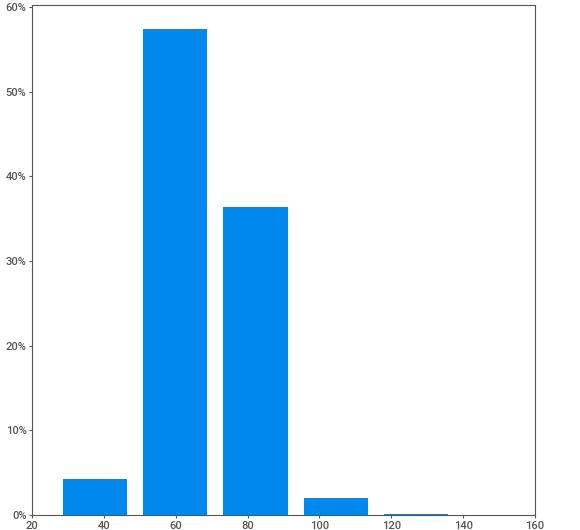
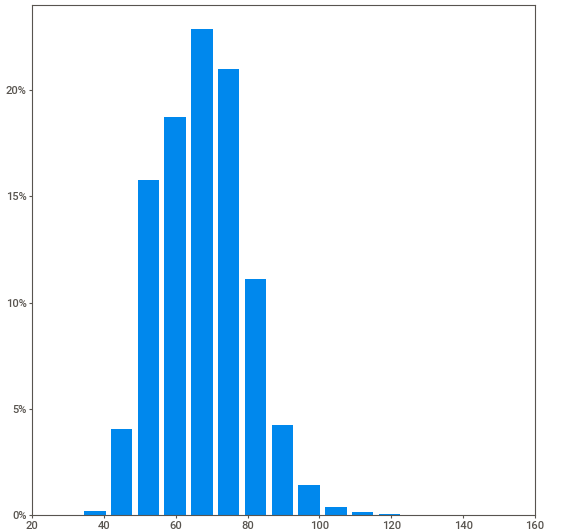
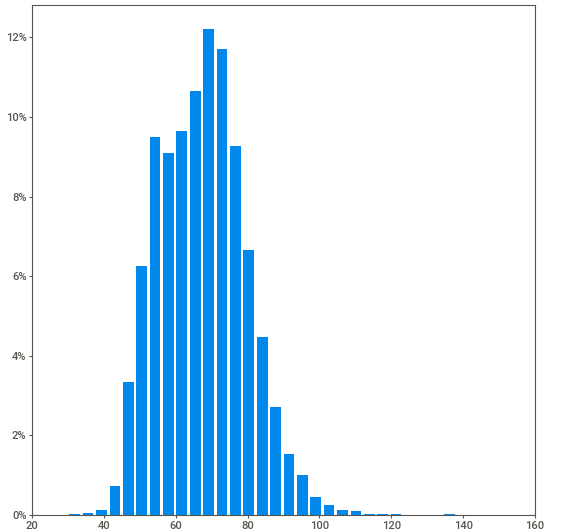
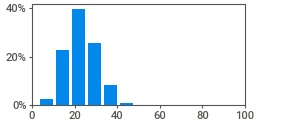
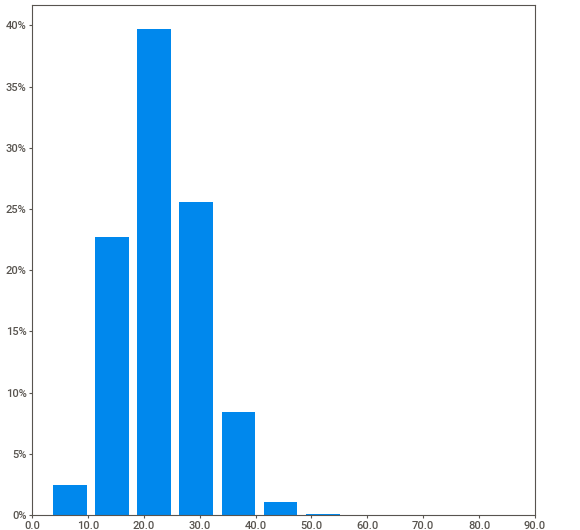
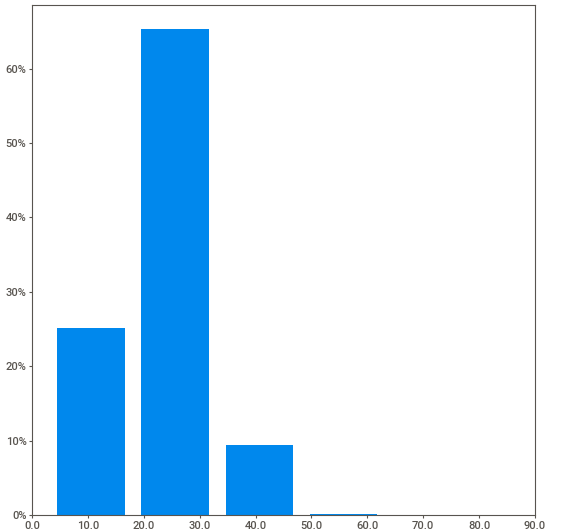
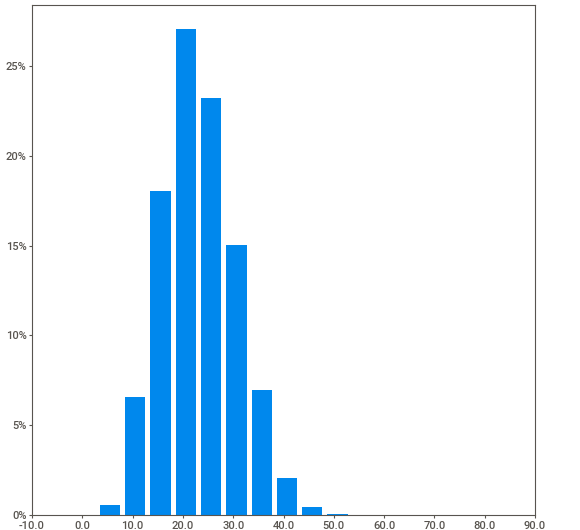
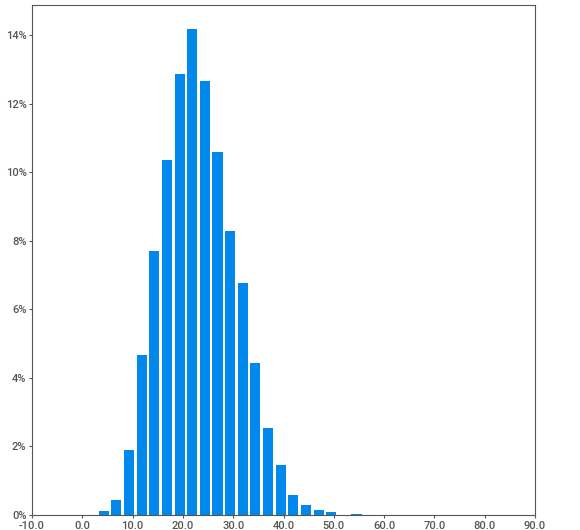
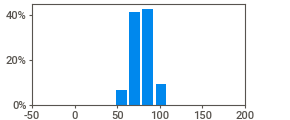
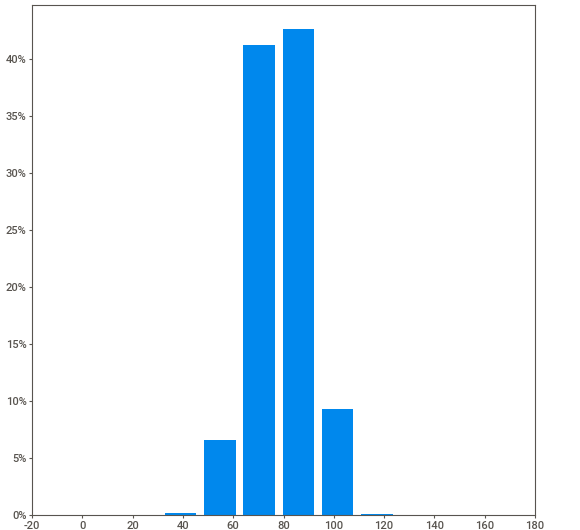
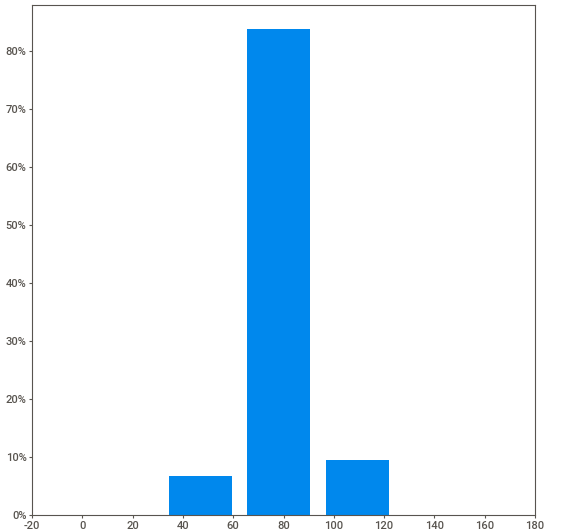
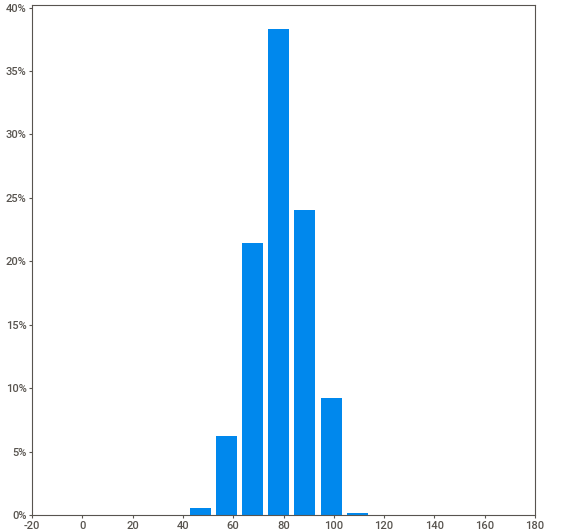
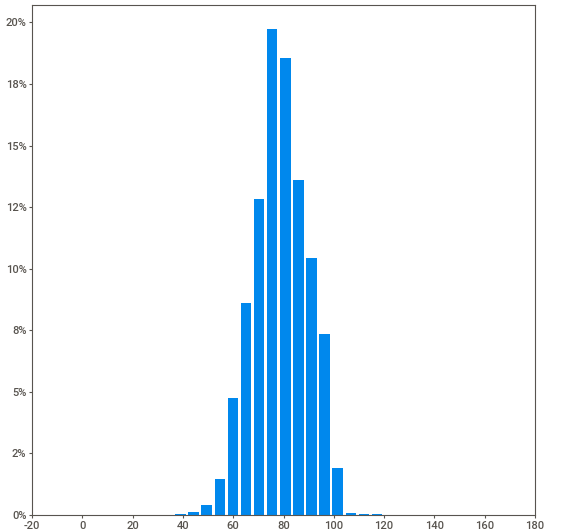
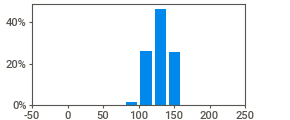
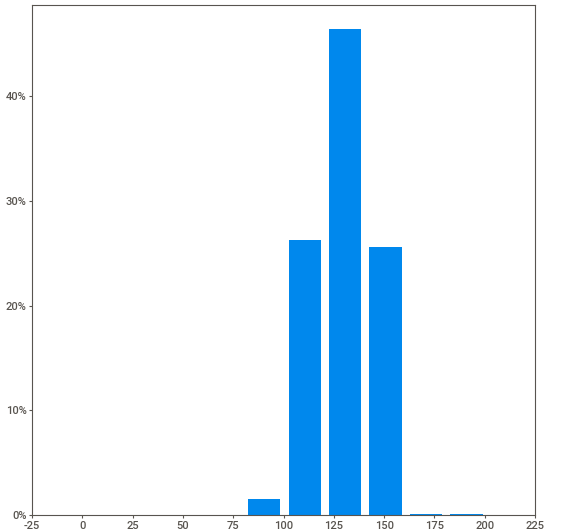
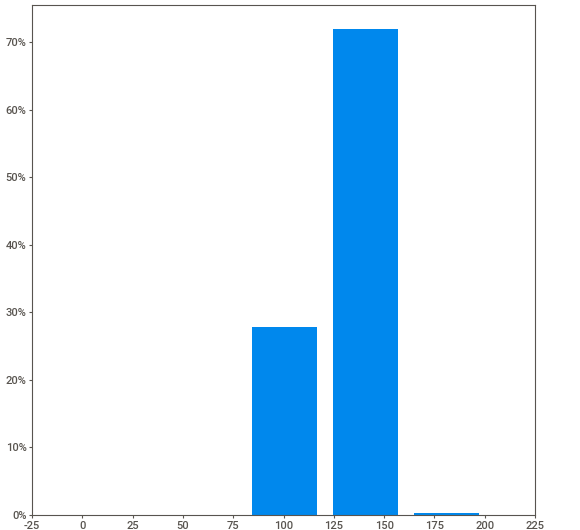
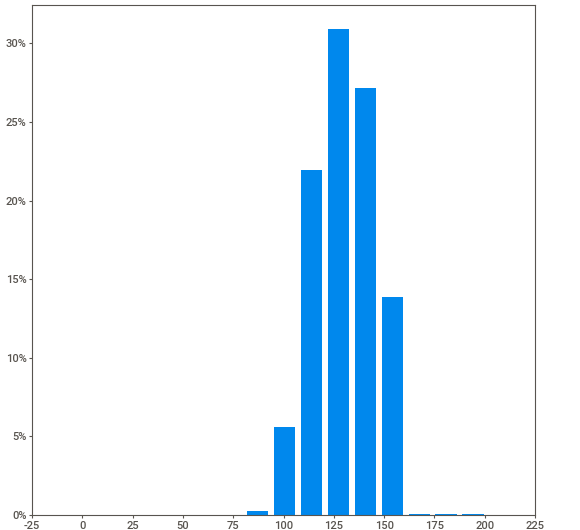
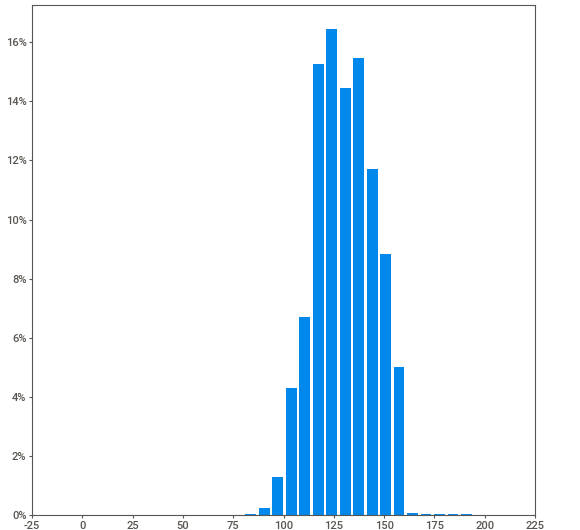
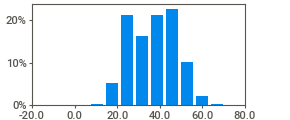
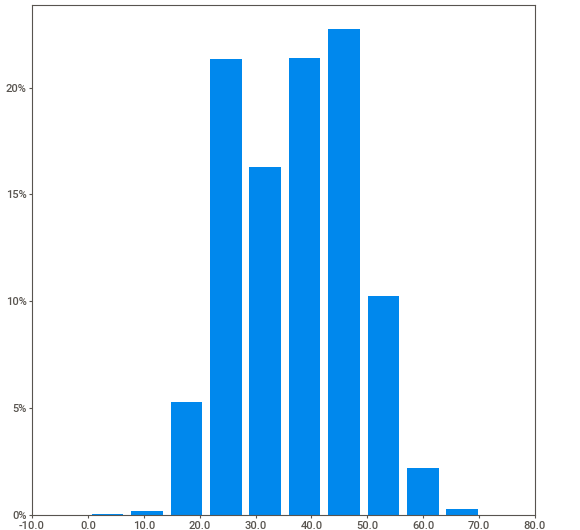
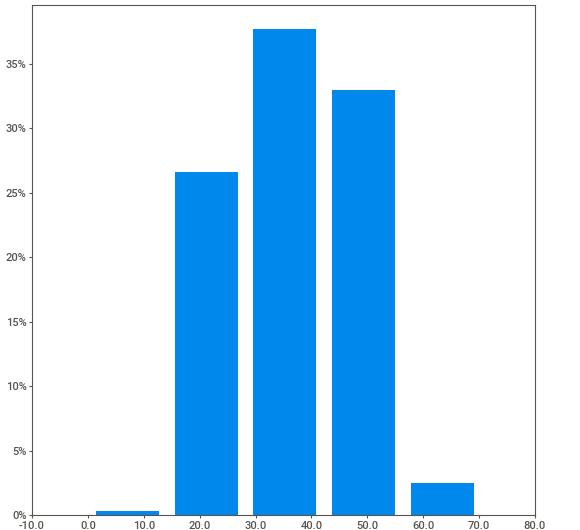
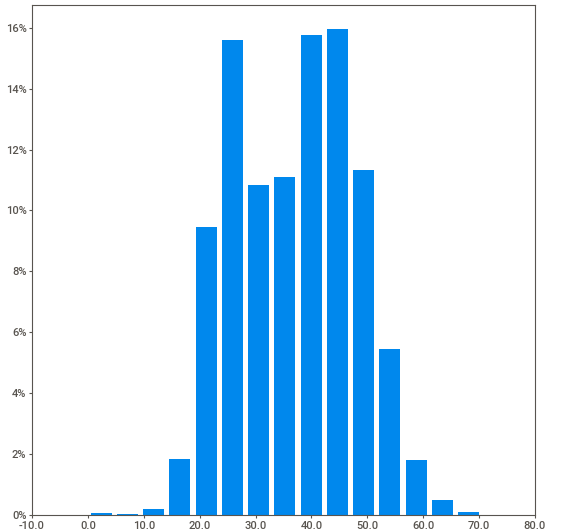
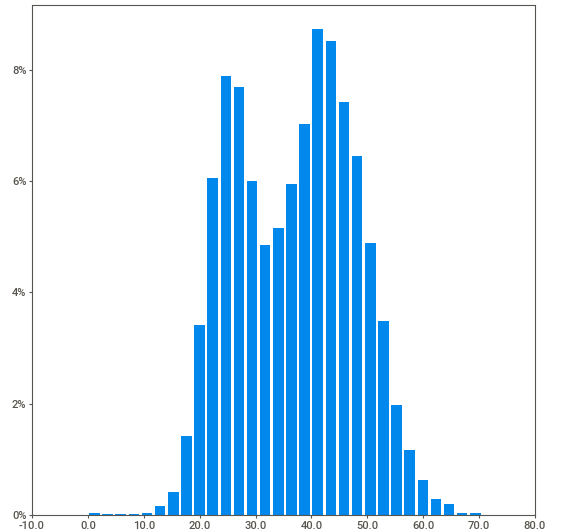
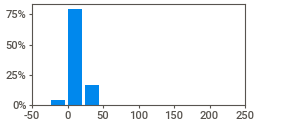
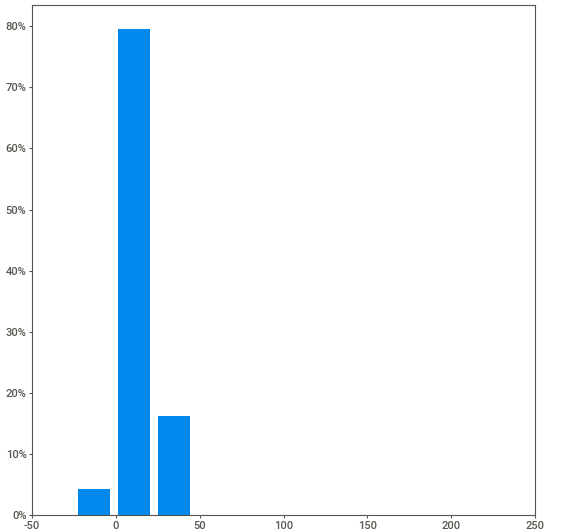
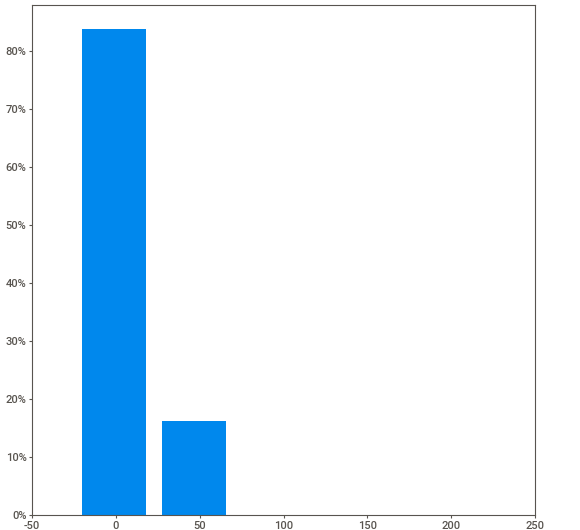
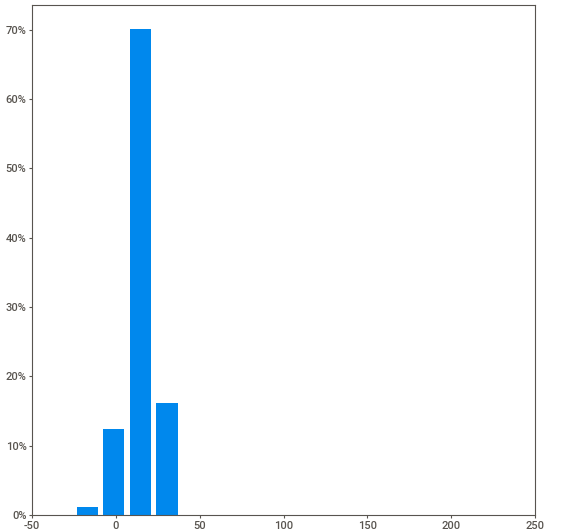
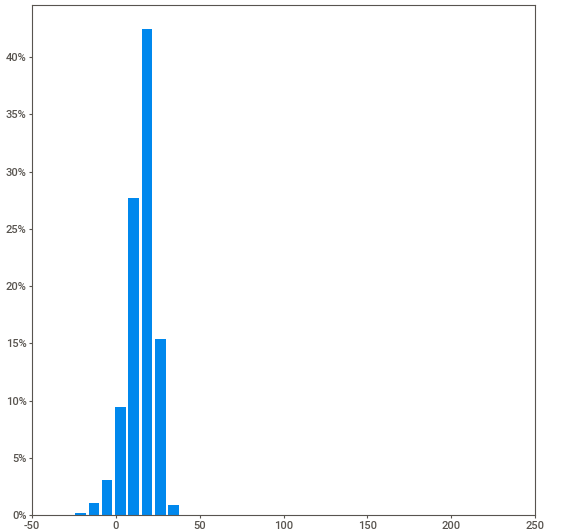
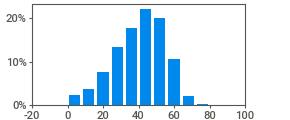
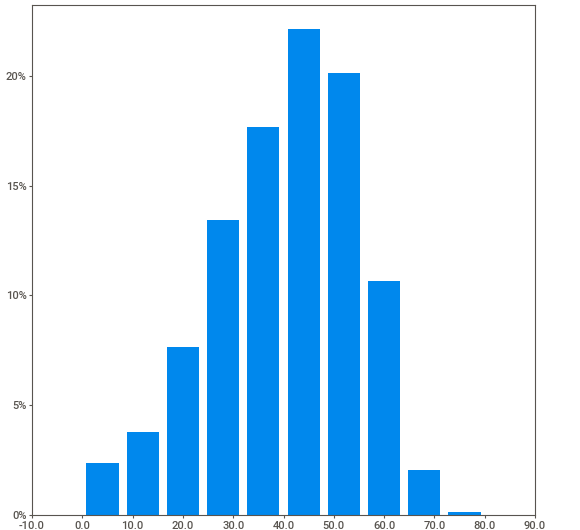
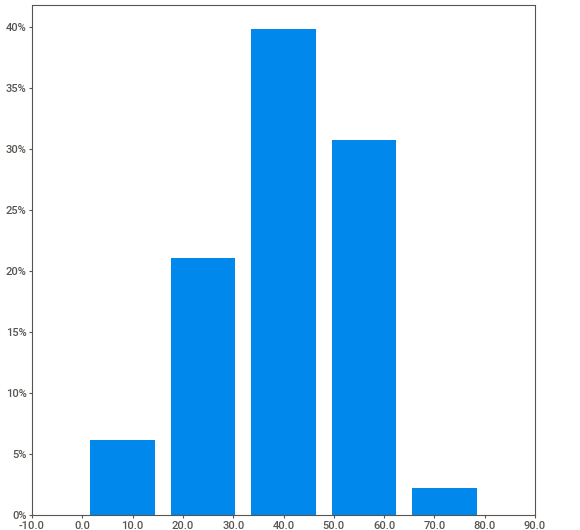
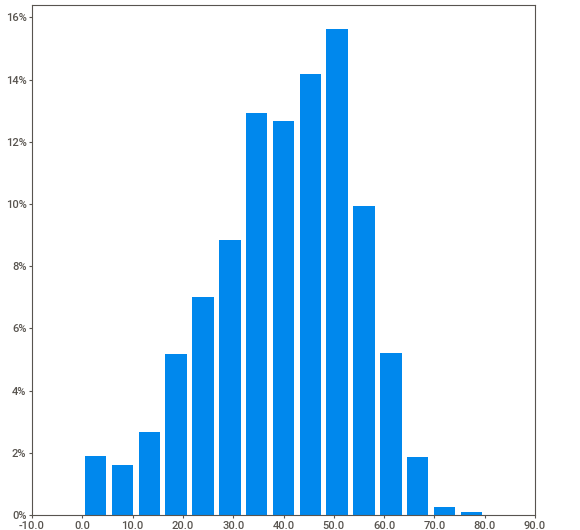
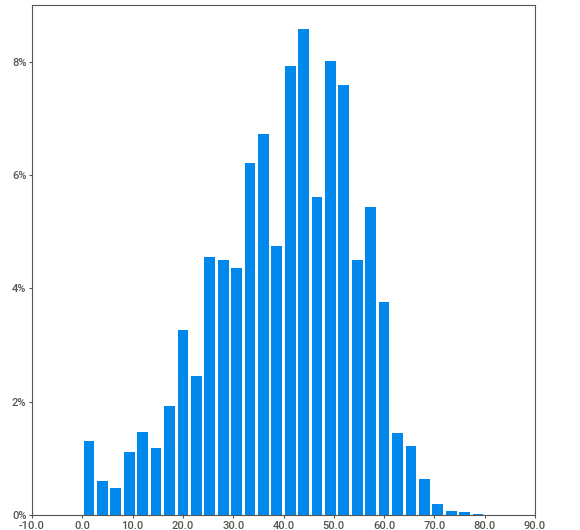
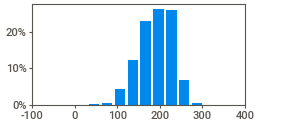
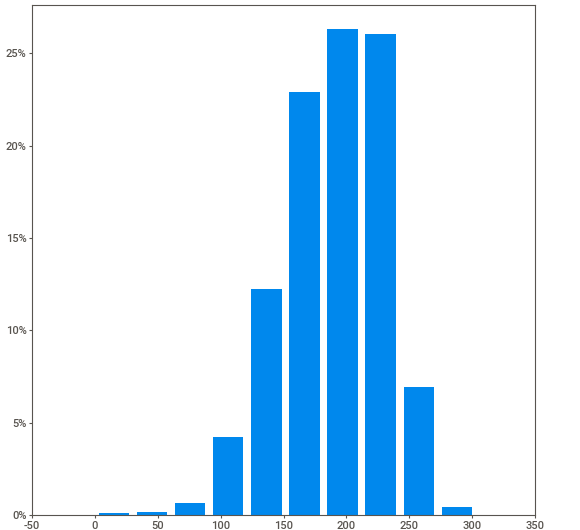
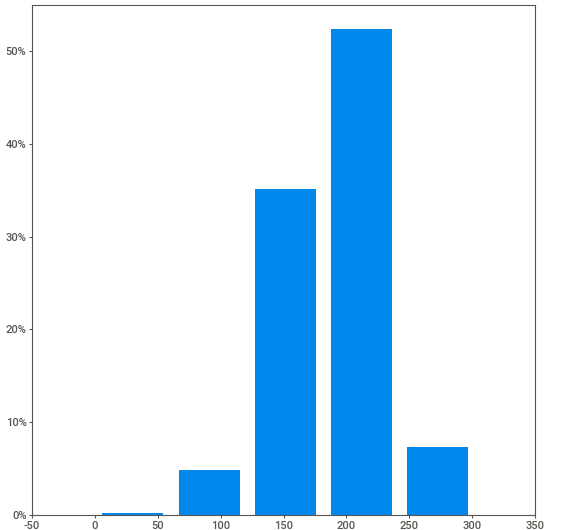
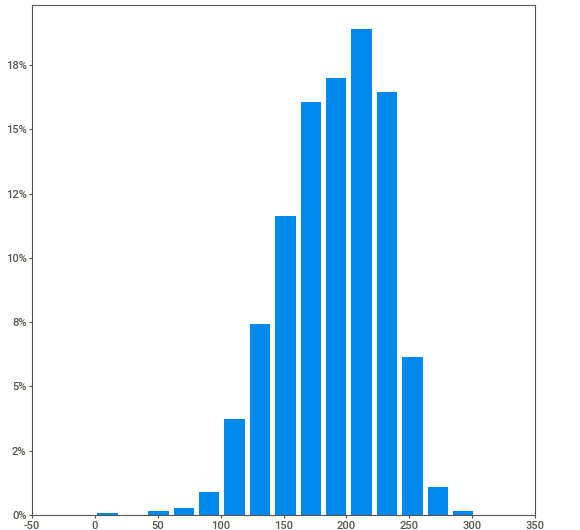
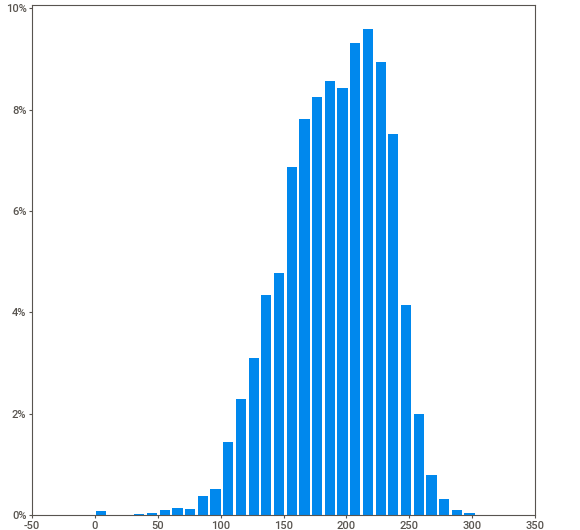
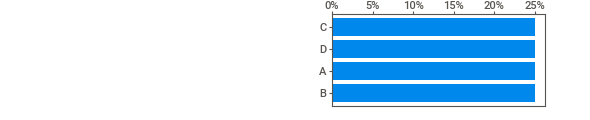
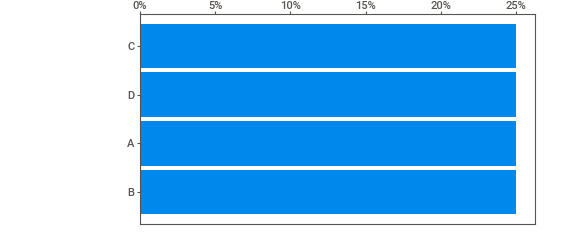
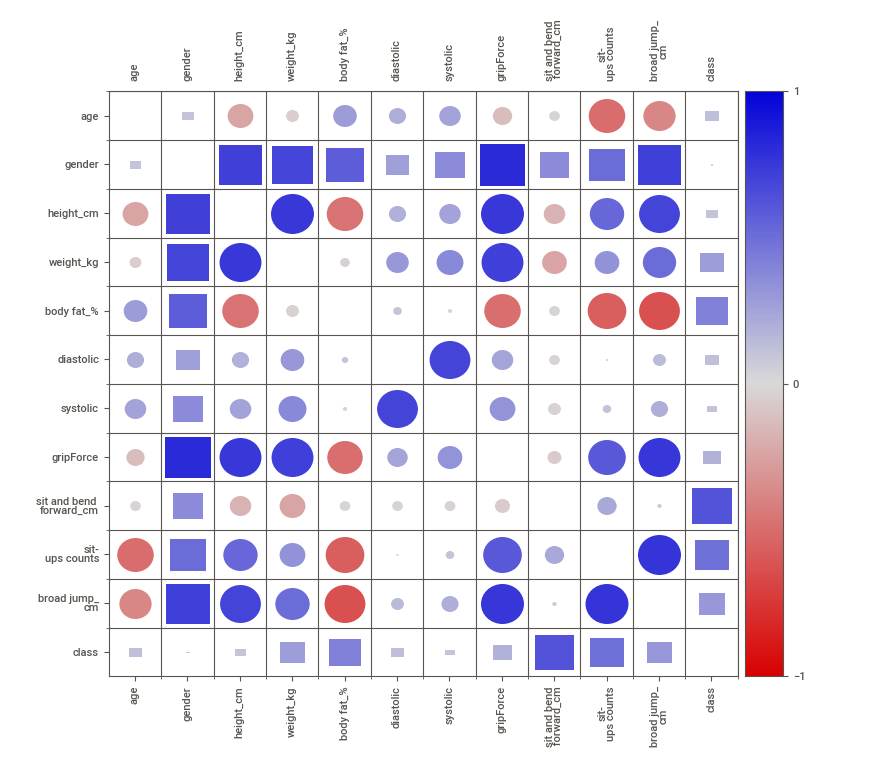
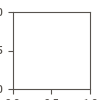

In [32]:
report = sv.analyze(df)
report.show_notebook()

## 1. Анализ данных

Используя библиотеку sweetviz можно достаточно просто провести разведочный анализ данных:

  Показатели:

    Категориальные - 2 шт: gender и class;
    Числовые - 10 шт: остальные.

  К примеру, характеристика для столбца **age**:

    Отсутствуют пропуски;
    Максимальынй возраст: 64;
    Минимальный возраст: 21;
    Средний возраст: 32.
  
  Так же, известно, что всего присутсвует 44 возраста(от 21 до 64) и можно посмотреть, сколько раз встречается какой либо возраст:

    21 - 7.2%;
    30 - 2.8%;
    37 - 2.1%;
    62 - 2.0% и т.д.

  Помимо оценок показателей каждого стоблца, можно посмотреть влияние показателей этой характеристики на другие, к примеру:

    GripForce:
      Численный ассоциации - большое влияние оказывают broad jump_cm, weight_kg, height_cm, малое влияние оказывает age, body_fat%
      Категориальные - зависит от gender.

  Учитывая эти показатели, становится ясно, что на силу сжатия кулака влияет вас рост, вес, и резульат прыжка в длину, а так же и пол. Очевидно, чем сильней и крепче человек, тем и сила сжатия кулака будет больше.

Для остальных всех признаков, процесс первичного анализа не отличается

Поскольку в нашем датасете есть дубликаты, что отражено в **SweetViz notebook'е**, и он 1, его необходимо удалить.

In [33]:
df = df.drop_duplicates()
print(f"Число дубликатов после удаления: {len(df[df.duplicated()])}")

Число дубликатов после удаления: 0


#3. Устранение пропусков

Помимо дубликатов, в датасете могут присутствовать и пропуски, поэтому их нужно устранить.

In [34]:
# Проверяем наличие пропусков
print(f"Количество пропусков: {df.isnull().sum().sum ()}")

Количество пропусков: 13


In [35]:
df = df.interpolate()

In [36]:
# Проверяем наличие пропусков после
print(f"Количество пропусков: {df.isnull().sum().sum()}")

Количество пропусков: 0


# 4. Работа с категориальными данными
Преобразуем категориальные переменные в числовой вид

In [37]:
print(f"Уникальные значения для столбца gender: {np.unique(df['gender'])}")

Уникальные значения для столбца gender: ['-' 'F' 'M']


Видно, у некоторых записей пол не указан

In [38]:
print(f"Количество записей без указанного пола: {df[df['gender']=='-'].shape[0]}")

Количество записей без указанного пола: 2


Так как таких записей всего 2, их можно удалить

In [39]:
df = df[df['gender']!='-']

In [40]:
print(f"Уникальные значения для столбца gender: {np.unique(df['gender'])}")
print(f"Количество записей без указанного пола: {df[df['gender']=='-'].shape[0]}")

Уникальные значения для столбца gender: ['F' 'M']
Количество записей без указанного пола: 0


In [41]:
np.unique(df['class'])

array(['A', 'B', 'C', 'D'], dtype=object)

In [42]:
le1 = OrdinalEncoder()
df['gender'] = le1.fit_transform(df['gender'].to_numpy().reshape(-1, 1))
le2 = OrdinalEncoder()
df['class'] = le2.fit_transform(df['class'].to_numpy().reshape(-1, 1))
print("___________________")

___________________


In [43]:
np.unique(df['class'])

array([0., 1., 2., 3.])

In [44]:
np.unique(df['gender'])

array([0., 1.])

#5. Выделение целевой переменной y и массива входных признаков X

Целевая переменная y - колонка class (df['class']), все остальное - входные признаки X

In [45]:
X = df.to_numpy()[:, :-1]
y = df.to_numpy()[:, -1]

# 6. Кросс-валидация, обучение модели

Выбрал DecisionTreeClassifier

In [46]:
skf = StratifiedKFold(n_splits=5)
acc = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  model = DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=5)
  scaler = RobustScaler()
  model.fit(scaler.fit_transform(X_train), y_train)
  acc.append(accuracy_score(y_test, model.predict(scaler.transform(X_test))))
print("Accuracy: ", np.mean(acc) * 100, "%")

Accuracy:  67.2890216579537 %


In [47]:
model = DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=5)
scaler = RobustScaler()
model.fit(scaler.fit_transform(X), y)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=5)

# 7. Веб-приложение Gradio

In [48]:
cols_names = list(df.columns[:-1].to_numpy())

In [51]:
inputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(11,"dynamic"), label="Входные данные", interactive=1, headers=cols_names)]
outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(1, "fixed"), label="Предположения", headers=["Класс"])]


print(le2.inverse_transform(y[0:10].reshape(-1, 1)))
ex = [X[:10]]


def infer(input_dataframe):
  scaled = scaler.transform(input_dataframe)
  pred = model.predict(scaled)
  return pd.DataFrame(pd.DataFrame(le2.inverse_transform(pred.reshape(-1, 1)), columns=["Класс"]))

gr.Interface(fn = infer, inputs = inputs, outputs = outputs, examples = ex).launch()

[['C']
 ['C']
 ['B']
 ['B']
 ['B']
 ['D']
 ['B']
 ['C']
 ['B']
 ['A']]
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>